In [2]:
! jt -t grade3 -nf opensans

/bin/sh: jt: command not found


<h1><center>1. Load Data</center></h1>



In [1]:
import os
import json
import warnings
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('../synthesized-web/project_templates/templates/credit.csv')
print(data.shape)
data.head()

(9999, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,effort,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,"(0.00649, 0.04]",9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,"(0.000309, 0.00134]",2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,"(0.000309, 0.00134]",3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,"(0.000309, 0.00134]",3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,"(-0.001, 0.000309]",63588.0,7,0,1,0,0.0


In [6]:
os.listdir('../synthesized-web/project_templates/templates/')

['price_paid_household.csv',
 'life-insurance.csv',
 'temp.csv',
 '.DS_Store',
 'epileptic-seizure.csv',
 'marketing-data_bank.csv',
 'prices_breakdown.csv',
 'marketing-data_ibm.csv',
 'credit.csv',
 'segmentation_analysis.csv',
 'homesite-quote-conversion.csv',
 'bank-loan-status-dataset.csv',
 'fire-peril.csv',
 'games.csv',
 'claim_prediction.csv',
 'churn_prediction.csv',
 'telecom-churn.csv',
 'PaySim1.csv',
 'diabetes.csv',
 'sales_pipeline.csv',
 'fraud_detection.csv',
 'fraud-time-series.csv',
 'air-quality.csv',
 'bank-churn.csv',
 'credit_card_default_prediction.csv',
 'noshowappointments.csv',
 'vehicle-insurance.csv',
 'businesses.csv']

In [2]:
datasets = [
    'price_paid_household.csv',
    'credit.csv',
    'claim_prediction.csv',
    'bank-loan-status-dataset.csv',
    'vehicle-insurance.csv'
]

In [9]:
from sklearn.model_selection import train_test_split
from synthesized import HighDimSynthesizer
from synthesized.common.values import CategoricalValue, ContinuousValue, NanValue
from synthesized.testing import UtilityTesting





<h1><center>Run experiments</center></h1>

2019-10-14 13:14:05.307213 :: Running experimets for dataset credit.csv
2019-10-14 13:14:05.327422 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.19238588858885886
Max distance: 0.37349424942494247
Average distance: 0.23346516515586352
Max distance: 0.792752935481669


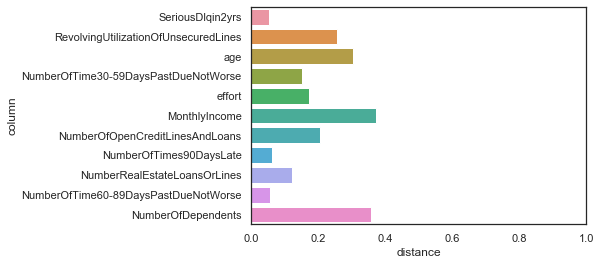

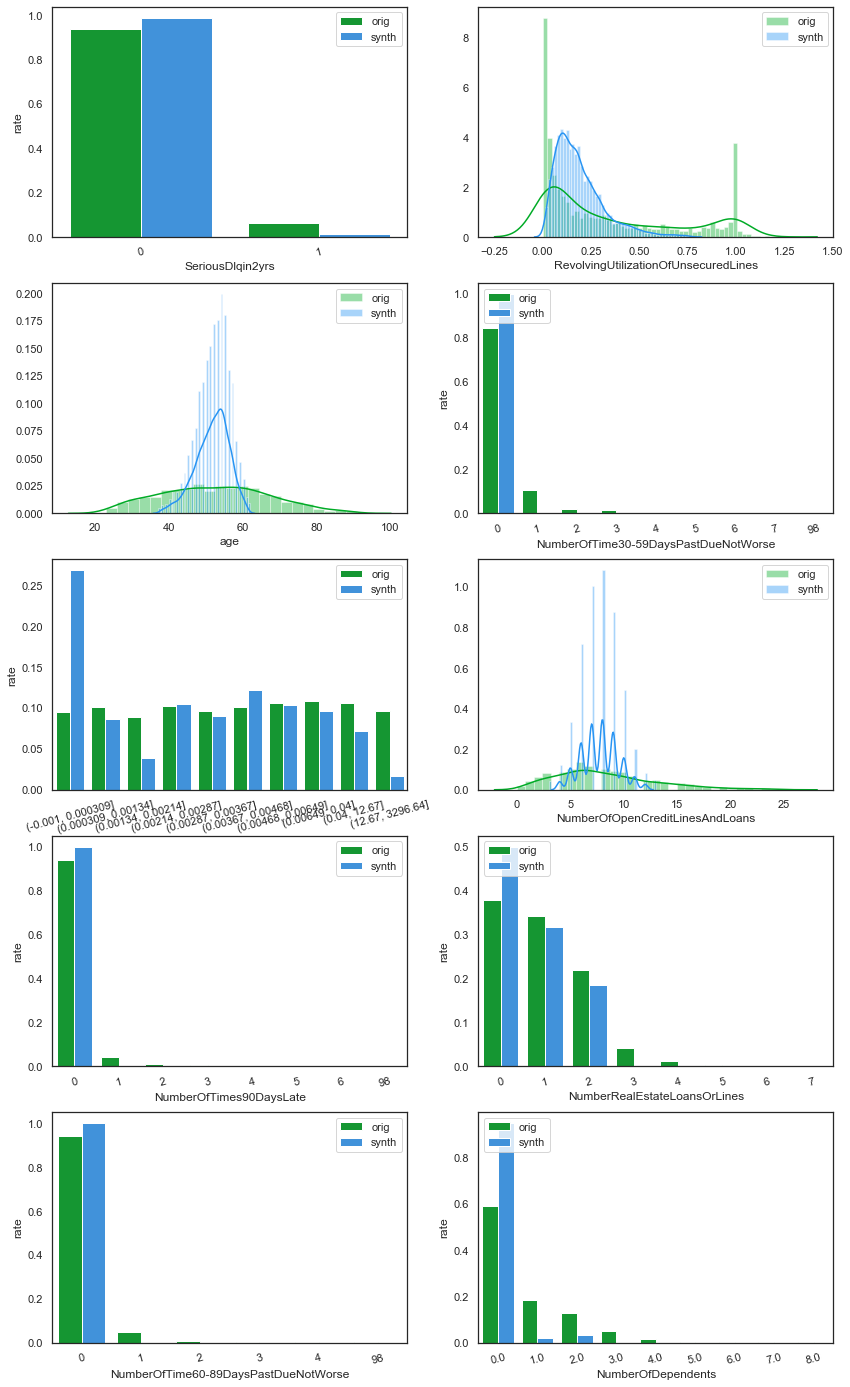

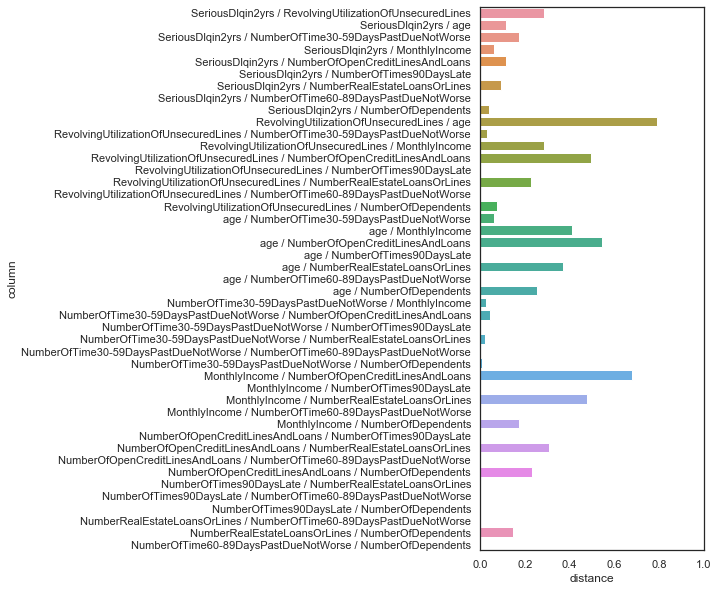

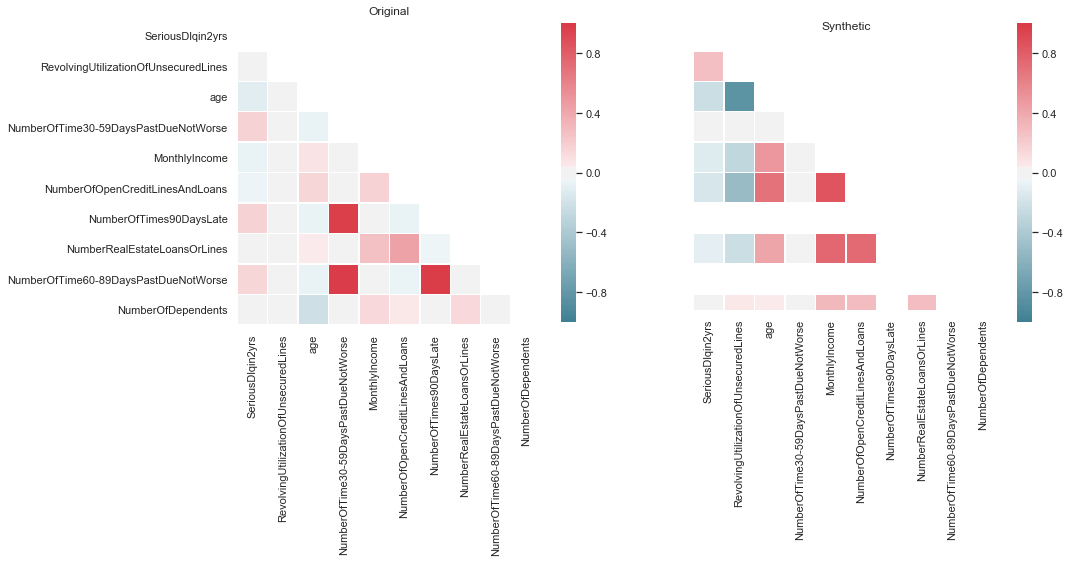

2019-10-14 13:14:24.552842 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.11136189528043712
Max distance: 0.2736924692469247
Average distance: 0.18668857188516097
Max distance: 0.8508832868989243


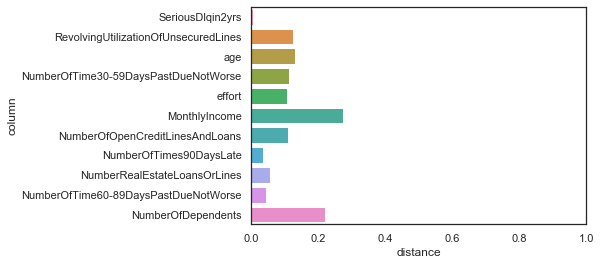

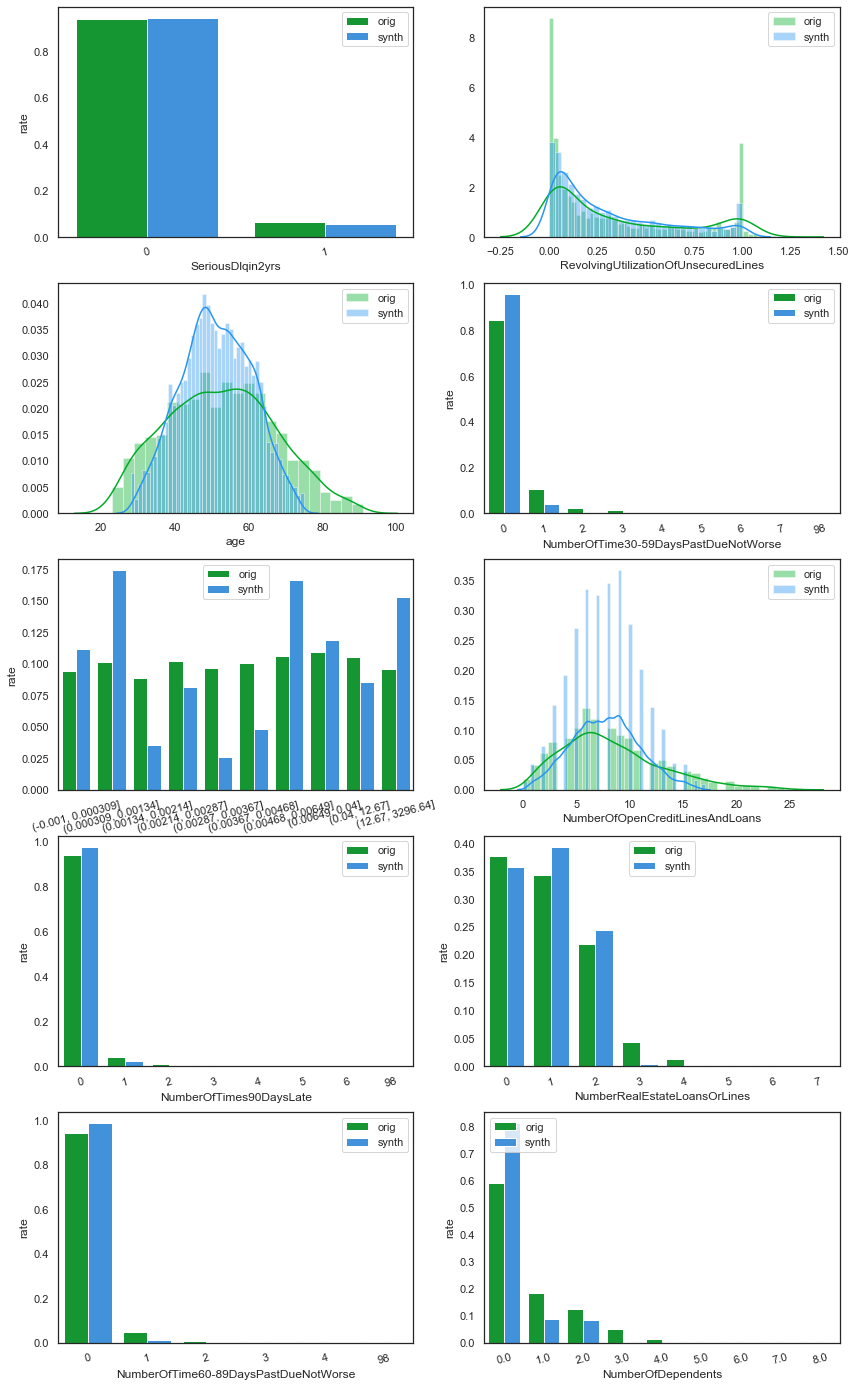

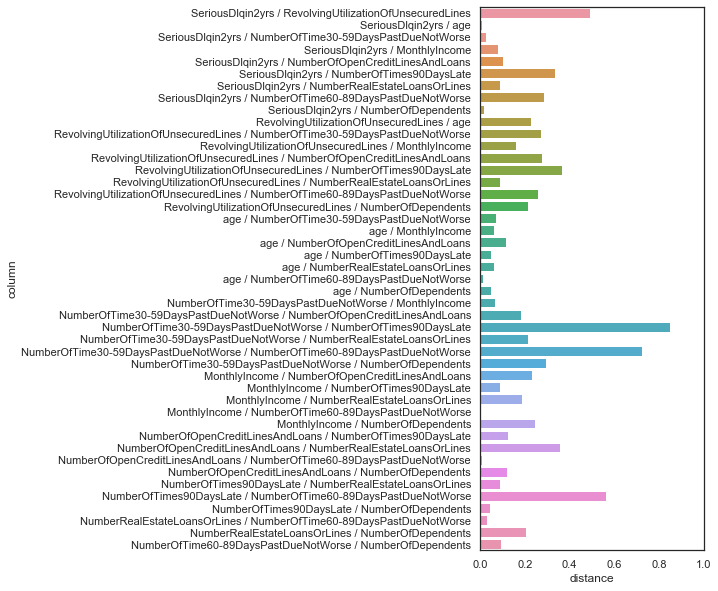

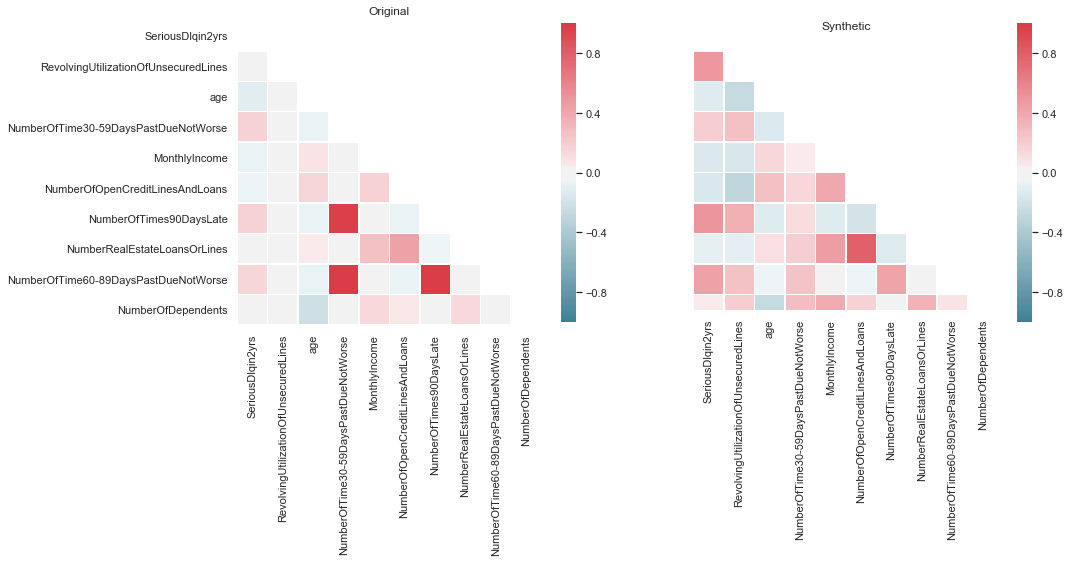

2019-10-14 13:14:44.570228 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.19443822109483674
Max distance: 0.3682958795879588
Average distance: 0.2599142089327208
Max distance: 0.8038355436922289


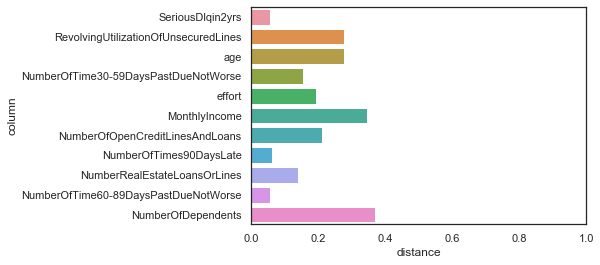

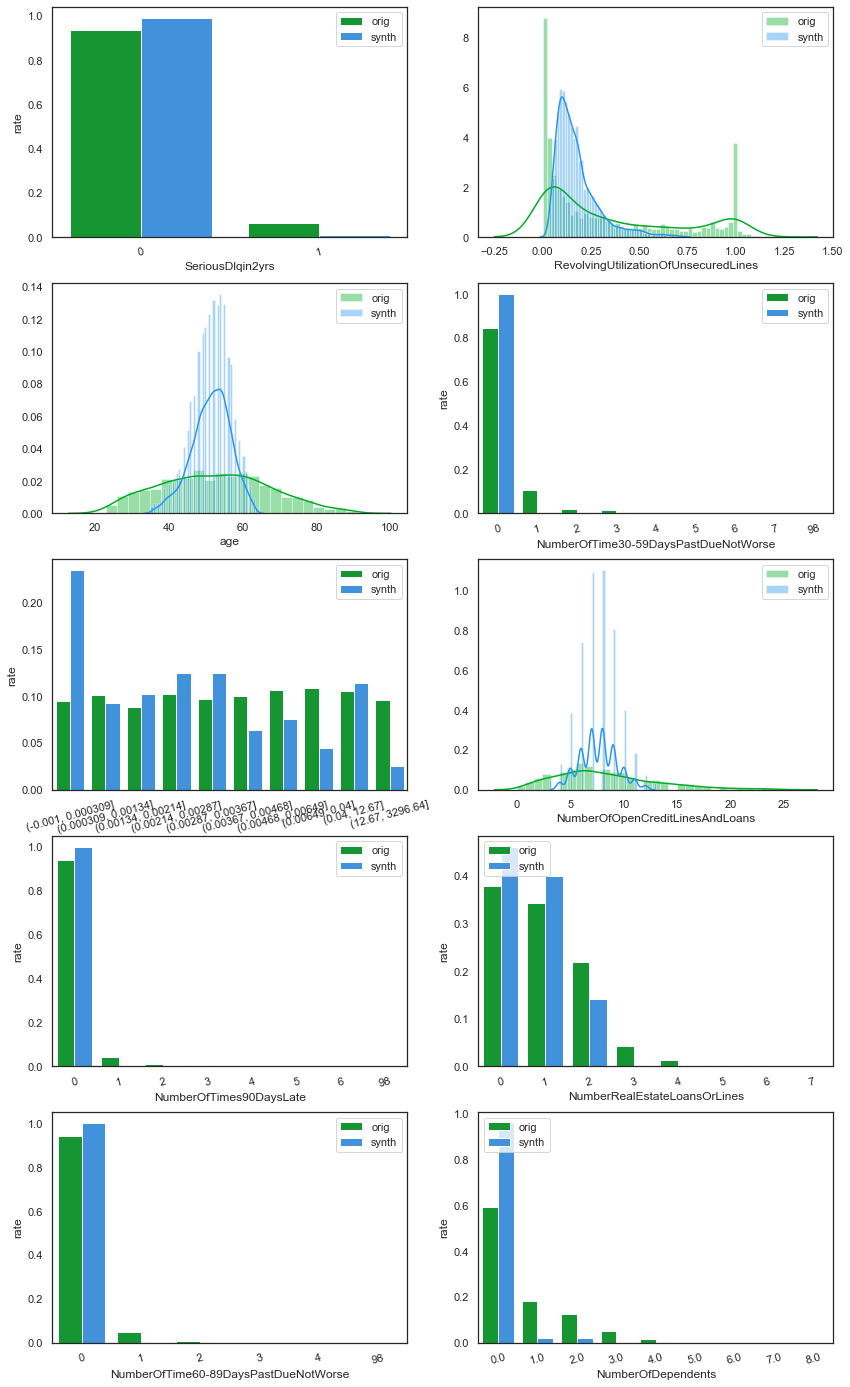

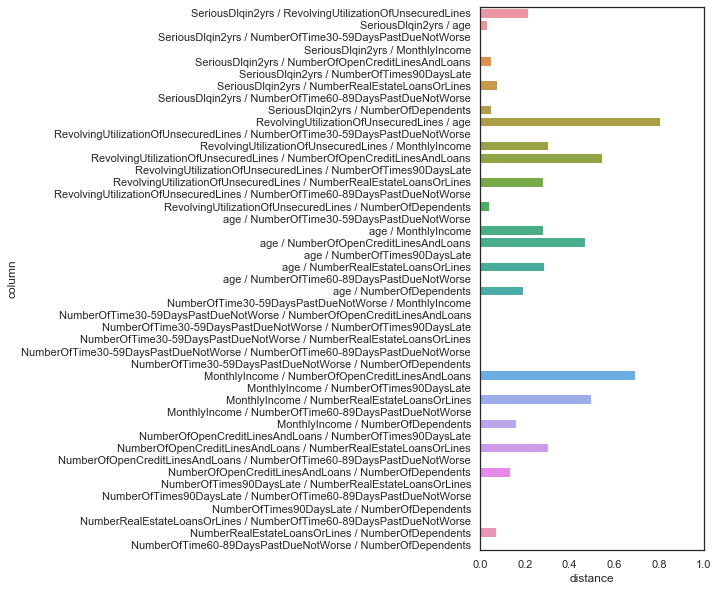

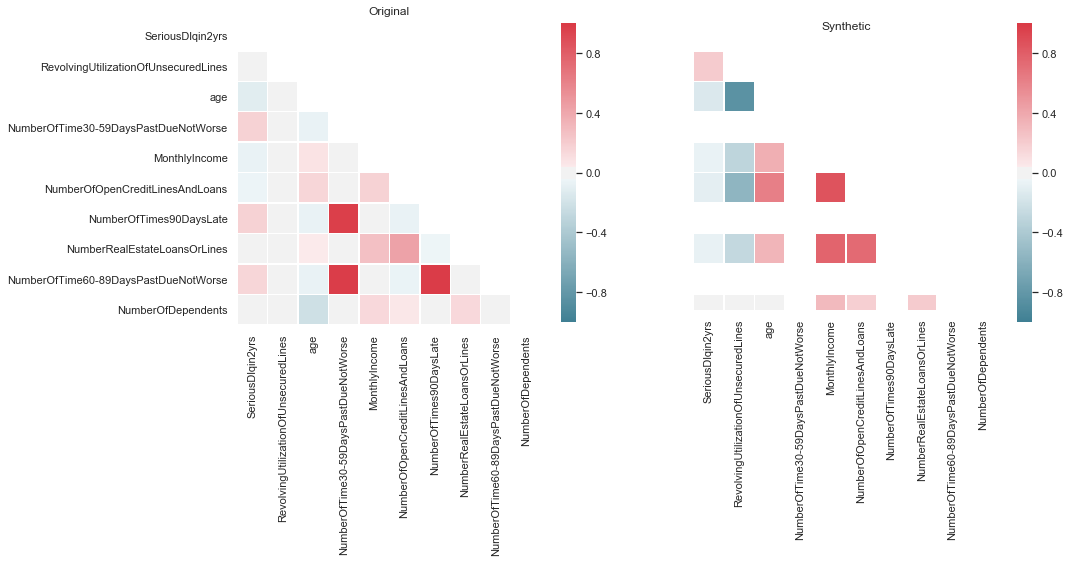

2019-10-14 13:15:05.704730 :: Experimets for dataset credit.csv finished


In [11]:
num_iterations = 15000

for dataset in datasets:    
    print('{} :: Running experimets for dataset {}'. format(datetime.now(), dataset))
    
    data = pd.read_csv('../synthesized-web/project_templates/templates/' + dataset)
    train, test = train_test_split(data, test_size=0.2, random_state=0)

    print('{} :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=1000, decay_rate=0.9) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()

    print('{} :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=1e-3, decay_steps=1000, decay_rate=0.9) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()

    print('{} :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=None, decay_rate=None) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()
    
    print('{} :: Experimets for dataset {} finished'. format(datetime.now(), dataset))
    
    print('===========================================')